Compares the average file size of images photographed of the coast versus the average size of images photographed more inland.  Using Hurrican Florence post-storm imagery. Size unit is in bytes until the values are scaled down using log()

In [363]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math




In [280]:
ct =pd.read_csv("catalog.csv")

Drop all columns except file and size

In [281]:
ct.drop(ct.columns[0], axis=1, inplace= True)
ct.drop(ct.columns[3:], axis=1, inplace=True)

ct.head()



,file,size,date
0,Florence/20180919c_jpgs/jpgs/C26256485.jpg,8265645,2018/09/19
1,Florence/20180919c_jpgs/jpgs/C26271559.jpg,9568353,2018/09/19
2,Florence/20180919c_jpgs/jpgs/C26259098.jpg,9094248,2018/09/19
3,Florence/20180919c_jpgs/jpgs/C26248841.jpg,7226118,2018/09/19
4,Florence/20180919c_jpgs/jpgs/C26258084.jpg,8531607,2018/09/19


Remove all storms but Florence

In [282]:
ct = ct.drop(ct.index[29097:])
ct.shape[0]


29097

In [283]:
data = ct[ct.date != ('2018/09/16', '2018/09/18', '2018/09/19', '2018/09/20')]
data.head()


,file,size,date
0,Florence/20180919c_jpgs/jpgs/C26256485.jpg,8265645,2018/09/19
1,Florence/20180919c_jpgs/jpgs/C26271559.jpg,9568353,2018/09/19
2,Florence/20180919c_jpgs/jpgs/C26259098.jpg,9094248,2018/09/19
3,Florence/20180919c_jpgs/jpgs/C26248841.jpg,7226118,2018/09/19
4,Florence/20180919c_jpgs/jpgs/C26258084.jpg,8531607,2018/09/19


In [284]:
data.shape[0]

29097

Demarcate coastal and inland images

In [285]:
cd = ct.loc[ct['date'] == '2018/09/17']
ind1 = ct.loc[ct['date'] == '2018/09/21']
ind2 = ct.loc[ct['date'] == '2018/09/22']

In [286]:
cd_size = cd.shape[0]
ind = ind1.append(ind2)
ind_size = ind.shape[0]


Two dataframes: cd (coastal data) and ind(inland data). Get the basic stats of each.

In [338]:
ind["log_value"] =np.log(ind["size"])
cd["log_value"] =np.log(cd["size"])

print("Inland mean:", ind["log_value"].mean())
print("Inland var:", ind["log_value"].var())
print("Inland std:", ind["log_value"].std())
print("Coastal mean:", cd["log_value"].mean())
print("Coastal var:", cd["log_value"].var())
print("Coastal std:", cd["log_value"].std())

cd_mean = cd["log_value"].mean()
cd_var = cd["log_value"].var()

Inland mean: 15.770437186485616
Inland var: 0.043449306893702654
Inland std: 0.20844497329919628
Coastal mean: 15.672385479488955
Coastal var: 0.02771328432391275
Coastal std: 0.16647307387055946


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Preparing variables for classroom method for fitting gamma distribution (didn't work due to scaling)

In [339]:
alpha_mom = cd_mean ** 2 / cd_var
beta_mom = cd_var / cd_mean

cd_min = cd["log_value"].min()
cd_max = cd["log_value"].max()

Plot histograms. 

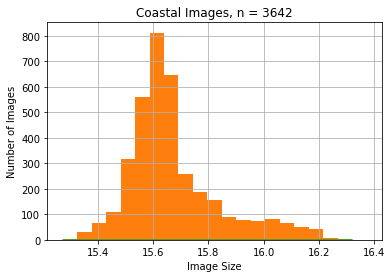

In [373]:
binwidth = (cd["log_value"].max()-cd["log_value"].min())/20
cd["log_value"].hist(bins=np.arange(cd_min, cd_max + binwidth, binwidth), normed = True)
cd_plot = cd["log_value"].hist(bins=np.arange(min(cd["log_value"]),max(cd["log_value"]) + binwidth, binwidth))
plt.xlabel("Image Size")
plt.ylabel( "Number of Images")
plt.title("Coastal Images, n = " + str(cd_size) + str())

plt.plot(np.linspace(cd_min, cd_max), gamma.pdf(np.linspace(cd_min, cd_max), alpha_mom, beta_mom))
plt.savefig('coastal_images_hist.png', dpi = 100)
plt.show()


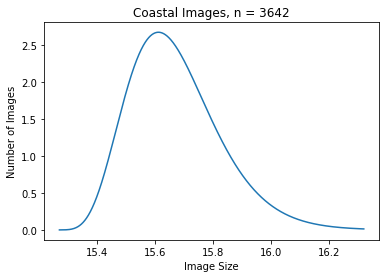

In [374]:
ag,bg,cg = stats.gamma.fit(cd["log_value"])
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)
plt.xlabel("Image Size")
plt.ylabel( "Number of Images")
plt.title("Coastal Images, n = " + str(cd_size) + str())
plt.savefig('coastal_images_gamma.png', dpi = 100)
plt.plot(lnspc, pdf_gamma, label="Gamma")


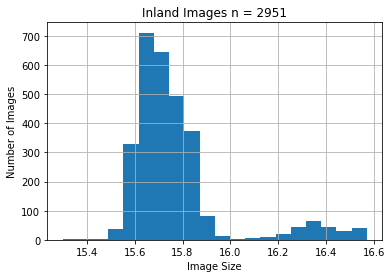

In [375]:
binwidth = (ind["log_value"].max()-ind["log_value"].min())/20
ind["log_value"].hist(bins=np.arange(min(ind["log_value"]),max(ind["log_value"]) + binwidth, binwidth))
plt.xlabel("Image Size")
plt.ylabel( "Number of Images")
plt.title("Inland Images n = " + str(ind_size) + str())
plt.savefig('inland_images_hist.png', dpi = 100)
plt.show()

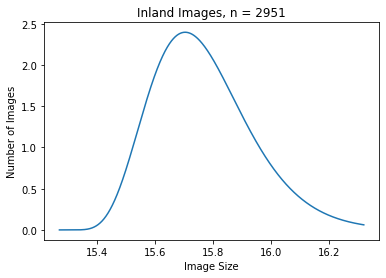

In [376]:
ag,bg,cg = stats.gamma.fit(ind["log_value"])
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)
plt.xlabel("Image Size")
plt.ylabel( "Number of Images")
plt.title("Inland Images, n = " + str(ind_size) + str())
plt.savefig('inland_images_gamma.png', dpi = 100)
plt.plot(lnspc, pdf_gamma, label="Gamma")


one tailed z- test

In [365]:
sample_size = 1000
sample = np.random.choice(a= cd["log_value"], size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

 # Get the population standard deviation

margin_of_error = z_critical * (cd_std /math.sqrt(cd_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
15.67356641506523
Confidence interval:
(15.668159841470699, 15.67897298865976)


two-tailed z-test

In [370]:
sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= cd["log_value"], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

     
    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (cd_std/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

Sample Mean:
15.680011917572024
Confidence interval:
(15.66969399915228, 15.690329835991768)
